#### Hack the Feed Hackathon by Play house communications 

Project Objectives 

- Create a comprehensive and reproducible report detailing their findings.
- Propose actionable recommendations based on the insights.
- Create a simple and engaging visualisation of your results & analysis.
 

In [82]:
# Getting started 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### The Data Cleaning Process

In [83]:
# bringing in the data
path1 = "Twitter.xls"
path2 = "LinkedIn.xls"
pd.set_option('display.max_columns',None)

T_data = pd.read_excel(path1)
L_data = pd.read_excel(path2)

In [84]:
# Checks the first 5 rows of the data
T_data.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,445.0,445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345718.0,0.0360,NaN,16.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,9.0,9.0,1.0,0.0,7.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-12-07 20:03:00,1679204777081860096,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,2961.0,2961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [85]:
T_data.shape

(8529, 147)

In [86]:
# removing columns with nan arrays and retaining the ones that have values in them
columns_with_nan = T_data.columns[T_data.isna().any()].tolist()
columns_to_retain = ['Impressions','Organic Impressions','Potential Reach','Engagement Rate (per Impression)',
                    'Engagements','Reactions','Likes','Comments','Shares','Click-Through Rate','Post Link Clicks',
                    'Other Post Clicks','Post Clicks (All)','Post Media Clicks','Post Hashtag Clicks','Post Detail Expand Clicks',
                    'Profile Clicks','Other Engagements','App Engagements','App Install Attempts','App Opens','Follows from Post',
                    'Unfollows from Post','Media Views','Tags']
retained_cols= T_data[columns_to_retain]
Twitter_data = T_data.drop(columns = columns_with_nan)
Twitter_data.keys()

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Post'],
      dtype='object')

In [87]:
retained_cols.keys()

Index(['Impressions', 'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Media Clicks',
       'Post Hashtag Clicks', 'Post Detail Expand Clicks', 'Profile Clicks',
       'Other Engagements', 'App Engagements', 'App Install Attempts',
       'App Opens', 'Follows from Post', 'Unfollows from Post', 'Media Views',
       'Tags'],
      dtype='object')

In [88]:
# combining columns without nan with the retained columns to form df1
Data1 = pd.concat([Twitter_data,retained_cols],axis = 1)

In [89]:
# Checks for null values
Data1.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Post                                   0
Impressions                          687
Organic Impressions                  687
Potential Reach                       80
Engagement Rate (per Impression)     688
Engagements                          687
Reactions                            687
Likes                                687
Comments                             687
Shares                               687
Click-Through Rate                  4916
Post Link Clicks                    4916
Other Post Clicks                    687
Post Clicks (All)                    687
Post Media Clicks                   1836
Post Hashtag Clicks                 2632
Post Detail Expand Clicks            687
Profile Clicks  

In [90]:
# dropping the Tags column becuase it has so many null values and may compromise the analysis
Data1 = Data1.drop('Tags',axis = 1)

In [91]:
Data1.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Post,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,Your money should not be a gamble. Before you ...,445.0,445.0,345718.0,0.0360,16.0,4.0,4.0,2.0,1.0,NaN,NaN,9.0,9.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2023-12-07 20:03:00,1679204777081860096,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,"What skill (s) do you have, that no one ever t...",2961.0,2961.0,347102.0,0.0176,52.0,11.0,11.0,20.0,3.0,NaN,NaN,18.0,18.0,NaN,1.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2023-12-07 19:00:00,1679189012798660096,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,Sade was able to acquire a home loan and make ...,850.0,850.0,347594.0,0.0424,36.0,4.0,4.0,1.0,3.0,0.0082,7.0,21.0,28.0,11.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
3,2023-12-07 18:20:00,1679179017084349952,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,Here are some mistakes you shouldn‚Äôt make du...,1499.0,1499.0,349169.0,0.0340,51.0,13.0,13.0,3.0,5.0,NaN,NaN,30.0,30.0,24.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4,2023-11-07 12:50:00,1678733396992740096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,Safeguard every aspect of your operations with...,1184.0,1184.0,345653.0,0.0152,18.0,7.0,7.0,3.0,1.0,NaN,NaN,7.0,7.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [92]:
Data1.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Post                                   0
Impressions                          687
Organic Impressions                  687
Potential Reach                       80
Engagement Rate (per Impression)     688
Engagements                          687
Reactions                            687
Likes                                687
Comments                             687
Shares                               687
Click-Through Rate                  4916
Post Link Clicks                    4916
Other Post Clicks                    687
Post Clicks (All)                    687
Post Media Clicks                   1836
Post Hashtag Clicks                 2632
Post Detail Expand Clicks            687
Profile Clicks  

In [93]:
# dropping the null values 
Data1 = Data1.dropna()

In [94]:
# No null value(s) present
Data1.isnull().sum()

Date                                0
Post ID                             0
Network                             0
Post Type                           0
Content Type                        0
Profile                             0
Sent by                             0
Post                                0
Impressions                         0
Organic Impressions                 0
Potential Reach                     0
Engagement Rate (per Impression)    0
Engagements                         0
Reactions                           0
Likes                               0
Comments                            0
Shares                              0
Click-Through Rate                  0
Post Link Clicks                    0
Other Post Clicks                   0
Post Clicks (All)                   0
Post Media Clicks                   0
Post Hashtag Clicks                 0
Post Detail Expand Clicks           0
Profile Clicks                      0
Other Engagements                   0
App Engageme

In [95]:
Data1.shape

(2523, 32)

In [96]:
Data1.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Post,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
2,2023-12-07 19:00:00,1679189012798660096,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,Sade was able to acquire a home loan and make ...,850.0,850.0,347594.0,0.0424,36.0,4.0,4.0,1.0,3.0,0.0082,7.0,21.0,28.0,11.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
5,2023-11-07 11:00:00,1678705730143099904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,Tell us in the comments.\n#ITCANBE https://t.c...,4598.0,4598.0,345734.0,0.0152,70.0,12.0,12.0,18.0,1.0,0.0002,1.0,38.0,39.0,15.0,1.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
9,2023-10-07 14:14:00,1678392147186149888,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,Let us work together to help you reach the rem...,1111.0,1111.0,347015.0,0.0216,24.0,5.0,5.0,4.0,2.0,0.0018,2.0,11.0,13.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
14,2023-09-07 15:00:00,1678041350074249984,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,"With our team of professionals, you can trust ...",916.0,916.0,345772.0,0.0240,22.0,2.0,2.0,3.0,1.0,0.0066,6.0,10.0,16.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
15,2023-09-07 12:00:00,1677996039578459904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,Don‚Äôt let fear of the managing your finances...,1292.0,1292.0,345782.0,0.0325,42.0,8.0,8.0,5.0,1.0,0.0015,2.0,26.0,28.0,15.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [97]:
# Repeating the entire process for LinkedIn data
L_data.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [98]:
L_data.shape

(7760, 147)

In [99]:
nan_cols = L_data.columns[L_data.isna().any()].tolist()
columns_to_leave = ['Impressions','Organic Impressions','Potential Reach','Engagement Rate (per Impression)',
                    'Engagements','Reactions','Likes','Comments','Shares','Click-Through Rate','Post Link Clicks',
                    'Other Post Clicks','Post Clicks (All)','Post Media Clicks','Post Hashtag Clicks','Post Detail Expand Clicks',
                    'Profile Clicks','Other Engagements','App Engagements','App Install Attempts','App Opens','Follows from Post',
                    'Unfollows from Post','Media Views','Tags']
retained_columns= L_data[columns_to_leave]
LinkedIn_data = L_data.drop(columns = nan_cols)
LinkedIn_data.keys()

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by'],
      dtype='object')

In [100]:
retained_columns.keys()

Index(['Impressions', 'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Media Clicks',
       'Post Hashtag Clicks', 'Post Detail Expand Clicks', 'Profile Clicks',
       'Other Engagements', 'App Engagements', 'App Install Attempts',
       'App Opens', 'Follows from Post', 'Unfollows from Post', 'Media Views',
       'Tags'],
      dtype='object')

In [101]:
Data2 = pd.concat([LinkedIn_data,retained_columns],axis = 1)

In [102]:
Data2.keys()

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Impressions', 'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Media Clicks',
       'Post Hashtag Clicks', 'Post Detail Expand Clicks', 'Profile Clicks',
       'Other Engagements', 'App Engagements', 'App Install Attempts',
       'App Opens', 'Follows from Post', 'Unfollows from Post', 'Media Views',
       'Tags'],
      dtype='object')

In [103]:
Data2.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-07 19:00:00,7084954641788010496,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,63.0,63.0,NaN,0.0952,6.0,3.0,3.0,0.0,0.0,0.0476,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekly Wealth Posts
3,2023-11-07 14:49:00,7084529022105230336,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,164.0,164.0,NaN,0.0183,3.0,1.0,1.0,0.0,0.0,0.0122,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekly Wealth Posts
4,2023-11-07 09:17:00,7084445462967069696,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,376.0,376.0,NaN,0.0505,19.0,11.0,11.0,0.0,0.0,0.0213,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
Data2.isnull().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Impressions                         1428
Organic Impressions                 1428
Potential Reach                     7760
Engagement Rate (per Impression)    1428
Engagements                         1428
Reactions                           1428
Likes                               1428
Comments                            1428
Shares                              1428
Click-Through Rate                  1428
Post Link Clicks                    1428
Other Post Clicks                   7760
Post Clicks (All)                   1428
Post Media Clicks                   7760
Post Hashtag Clicks                 7760
Post Detail Expand Clicks           7760
Profile Clicks                      7760
Other Engagement

In [105]:
Data2.shape

(7760, 32)

In [106]:
# dropping columns with array nan
Data2 = Data2.drop(['Potential Reach','Other Post Clicks','Post Media Clicks','Post Hashtag Clicks',
            'Post Detail Expand Clicks','Profile Clicks','Other Engagements','App Engagements',
           'App Install Attempts','App Opens','Follows from Post','Unfollows from Post','Media Views','Tags'],axis = 1)

In [107]:
Data2.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Impressions                         1428
Organic Impressions                 1428
Engagement Rate (per Impression)    1428
Engagements                         1428
Reactions                           1428
Likes                               1428
Comments                            1428
Shares                              1428
Click-Through Rate                  1428
Post Link Clicks                    1428
Post Clicks (All)                   1428
dtype: int64

In [108]:
# dropping null values
Data2 = Data2.dropna()

In [109]:
Data2.isnull().sum()

Date                                0
Post ID                             0
Network                             0
Post Type                           0
Content Type                        0
Profile                             0
Sent by                             0
Impressions                         0
Organic Impressions                 0
Engagement Rate (per Impression)    0
Engagements                         0
Reactions                           0
Likes                               0
Comments                            0
Shares                              0
Click-Through Rate                  0
Post Link Clicks                    0
Post Clicks (All)                   0
dtype: int64

In [110]:
Data1.keys()

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Post', 'Impressions', 'Organic Impressions',
       'Potential Reach', 'Engagement Rate (per Impression)', 'Engagements',
       'Reactions', 'Likes', 'Comments', 'Shares', 'Click-Through Rate',
       'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)',
       'Post Media Clicks', 'Post Hashtag Clicks', 'Post Detail Expand Clicks',
       'Profile Clicks', 'Other Engagements', 'App Engagements',
       'App Install Attempts', 'App Opens', 'Follows from Post',
       'Unfollows from Post', 'Media Views'],
      dtype='object')

In [111]:
Data2.keys()

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)'],
      dtype='object')

In [112]:
# combining the 2 dataframes together
common_columns = list(Data1.columns.intersection(Data2.columns))
data = pd.concat([Data1[common_columns], Data2[common_columns]], ignore_index=True)

In [113]:
data.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All)
0,2023-12-07 19:00:00,1679189012798660096,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,850.0,850.0,0.0424,36.0,4.0,4.0,1.0,3.0,0.0082,7.0,28.0
1,2023-11-07 11:00:00,1678705730143099904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,4598.0,4598.0,0.0152,70.0,12.0,12.0,18.0,1.0,0.0002,1.0,39.0
2,2023-10-07 14:14:00,1678392147186149888,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,1111.0,1111.0,0.0216,24.0,5.0,5.0,4.0,2.0,0.0018,2.0,13.0
3,2023-09-07 15:00:00,1678041350074249984,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,916.0,916.0,0.0240,22.0,2.0,2.0,3.0,1.0,0.0066,6.0,16.0
4,2023-09-07 12:00:00,1677996039578459904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,1292.0,1292.0,0.0325,42.0,8.0,8.0,5.0,1.0,0.0015,2.0,28.0


In [114]:
data.isna().sum()

Date                                0
Post ID                             0
Network                             0
Post Type                           0
Content Type                        0
Profile                             0
Sent by                             0
Impressions                         0
Organic Impressions                 0
Engagement Rate (per Impression)    0
Engagements                         0
Reactions                           0
Likes                               0
Comments                            0
Shares                              0
Click-Through Rate                  0
Post Link Clicks                    0
Post Clicks (All)                   0
dtype: int64

In [115]:
data.shape

(8855, 18)

In [116]:
# changing datatypes from float to int 
columns_to_be_converted = ['Impressions','Organic Impressions','Engagements','Reactions','Likes',
                          'Comments','Shares','Post Link Clicks','Post Clicks (All)']
for column in columns_to_be_converted:
    data[column] = data[column].astype(int)

In [117]:
data.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All)
0,2023-12-07 19:00:00,1679189012798660096,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,850,850,0.0424,36,4,4,1,3,0.0082,7,28
1,2023-11-07 11:00:00,1678705730143099904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,4598,4598,0.0152,70,12,12,18,1,0.0002,1,39
2,2023-10-07 14:14:00,1678392147186149888,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,1111,1111,0.0216,24,5,5,4,2,0.0018,2,13
3,2023-09-07 15:00:00,1678041350074249984,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,916,916,0.0240,22,2,2,3,1,0.0066,6,16
4,2023-09-07 12:00:00,1677996039578459904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,1292,1292,0.0325,42,8,8,5,1,0.0015,2,28


In [118]:
data.dtypes

Date                                 object
Post ID                               int64
Network                              object
Post Type                            object
Content Type                         object
Profile                              object
Sent by                              object
Impressions                           int32
Organic Impressions                   int32
Engagement Rate (per Impression)    float64
Engagements                           int32
Reactions                             int32
Likes                                 int32
Comments                              int32
Shares                                int32
Click-Through Rate                  float64
Post Link Clicks                      int32
Post Clicks (All)                     int32
dtype: object

##### Data Exploration and Analysis

In [119]:
data.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)'],
      dtype='object')

In [120]:
data.describe()

,Post ID,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All)
count,8.855000e+03,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000,8855.000000
mean,5.201505e+18,1731.111575,1731.111575,0.061069,74.548165,19.080858,19.080858,2.763072,3.776849,0.012131,24.549181,48.914399
std,2.489719e+18,2514.563095,2514.563095,0.333426,281.970140,152.316187,152.316187,11.783334,14.059215,0.023467,154.967764,202.618489
min,5.219923e+17,1.000000,1.000000,-0.012000,-23.000000,-103.000000,-103.000000,-16.000000,-6.000000,0.000000,0.000000,0.000000
25%,1.604649e+18,574.000000,574.000000,0.019200,14.000000,6.000000,6.000000,0.000000,0.000000,0.002100,2.000000,5.000000
50%,6.656159e+18,1002.000000,1002.000000,0.026800,27.000000,10.000000,10.000000,0.000000,1.000000,0.007300,6.000000,12.000000
75%,6.879782e+18,1937.500000,1937.500000,0.037150,58.500000,17.000000,17.000000,2.000000,3.000000,0.013800,13.000000,33.000000
max,7.084955e+18,70467.000000,70467.000000,9.000000,14972.000000,13528.000000,13528.000000,359.000000,914.000000,0.583300,6089.000000,6089.000000


In [121]:
import datetime 

data['Date'] = pd.to_datetime(data['Date'])

In [122]:
# Extracting year, monthname , day and hour from the date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day_name()
data['Time'] = data['Date'].dt.hour

In [123]:
data.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Year,Month,Day,Time
0,2023-12-07 19:00:00,1679189012798660096,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,850,850,0.0424,36,4,4,1,3,0.0082,7,28,2023,December,Thursday,19
1,2023-11-07 11:00:00,1678705730143099904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,4598,4598,0.0152,70,12,12,18,1,0.0002,1,39,2023,November,Tuesday,11
2,2023-10-07 14:14:00,1678392147186149888,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,1111,1111,0.0216,24,5,5,4,2,0.0018,2,13,2023,October,Saturday,14
3,2023-09-07 15:00:00,1678041350074249984,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,916,916,0.0240,22,2,2,3,1,0.0066,6,16,2023,September,Thursday,15
4,2023-09-07 12:00:00,1677996039578459904,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,1292,1292,0.0325,42,8,8,5,1,0.0015,2,28,2023,September,Thursday,12


In [124]:
#data = data.drop('Date',axis = 1)

In [125]:
data.keys()

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

#### Correlation matrix 

In [126]:
correlation_matrix = data.corr()

In [127]:
correlation_matrix

,Post ID,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Year,Time
Post ID,1.000000,-0.418762,-0.418762,0.037219,-0.137342,-0.035498,-0.035498,-0.209271,-0.281877,0.267141,0.078476,-0.132608,0.254666,-0.027212
Impressions,-0.418762,1.000000,1.000000,-0.037180,0.569573,0.172759,0.172759,0.544638,0.393522,0.060115,0.260269,0.603552,-0.196550,0.024931
Organic Impressions,-0.418762,1.000000,1.000000,-0.037180,0.569573,0.172759,0.172759,0.544638,0.393522,0.060115,0.260269,0.603552,-0.196550,0.024931
Engagement Rate (per Impression),0.037219,-0.037180,-0.037180,1.000000,0.049765,0.047687,0.047687,0.008480,0.021922,0.064818,0.038729,0.031391,-0.116392,-0.017869
Engagements,-0.137342,0.569573,0.569573,0.049765,1.000000,0.676561,0.676561,0.440520,0.646193,0.392301,0.594578,0.812342,-0.047682,0.040717
Reactions,-0.035498,0.172759,0.172759,0.047687,0.676561,1.000000,1.000000,0.200768,0.792405,0.041592,0.087534,0.123108,-0.016681,0.015346
Likes,-0.035498,0.172759,0.172759,0.047687,0.676561,1.000000,1.000000,0.200768,0.792405,0.041592,0.087534,0.123108,-0.016681,0.015346
Comments,-0.209271,0.544638,0.544638,0.008480,0.440520,0.200768,0.200768,1.000000,0.257822,-0.019009,0.066733,0.385956,0.035844,0.023878
Shares,-0.281877,0.393522,0.393522,0.021922,0.646193,0.792405,0.792405,0.257822,1.000000,-0.057965,0.010196,0.219022,-0.216089,-0.001887
Click-Through Rate,0.267141,0.060115,0.060115,0.064818,0.392301,0.041592,0.041592,-0.019009,-0.057965,1.000000,0.748895,0.519828,0.073607,0.040361


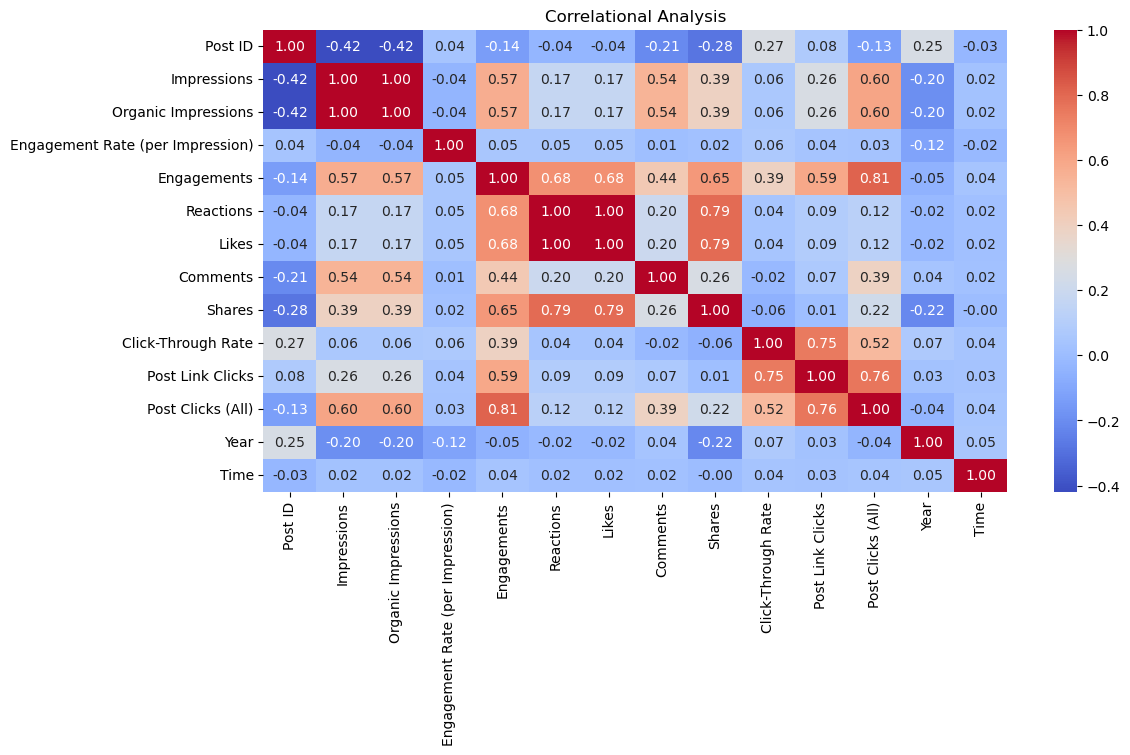

In [128]:
plt.figure(figsize = (12,6))

sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt=".2f")
plt.title('Correlational Analysis')
plt.show()

###### Q1. Engagement per network

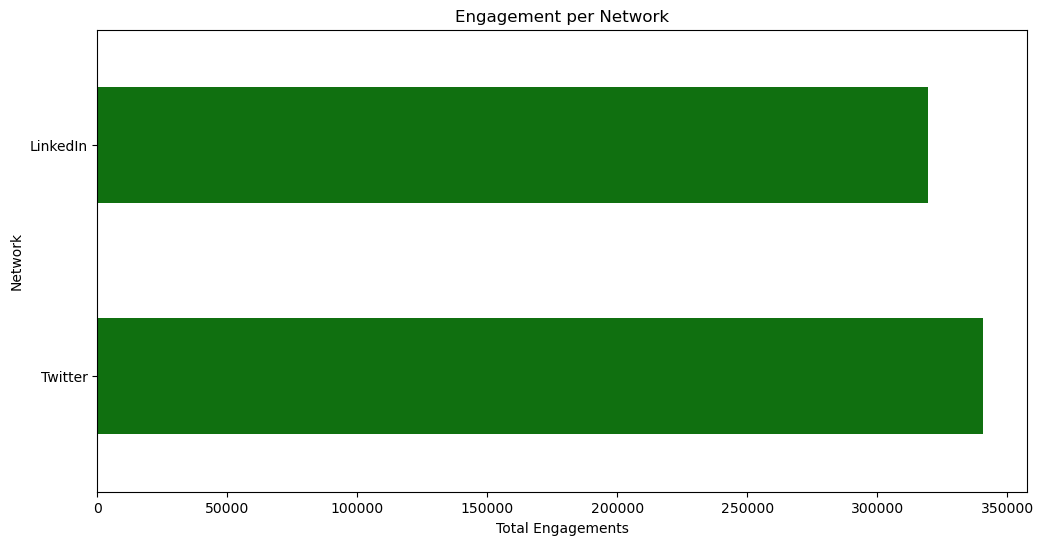

In [129]:
epn = data.groupby('Network')['Engagements'].sum().reset_index(name = 'Total Engagements')
plt.figure(figsize=(12,6))
sns.barplot(data = epn, x= 'Total Engagements',y ='Network',color = 'Green',width = 0.5)
plt.title('Engagement per Network')
plt.show()


- Twitter has the most engagements

###### Q2. What is the average Engagement rate per Impression for each network?

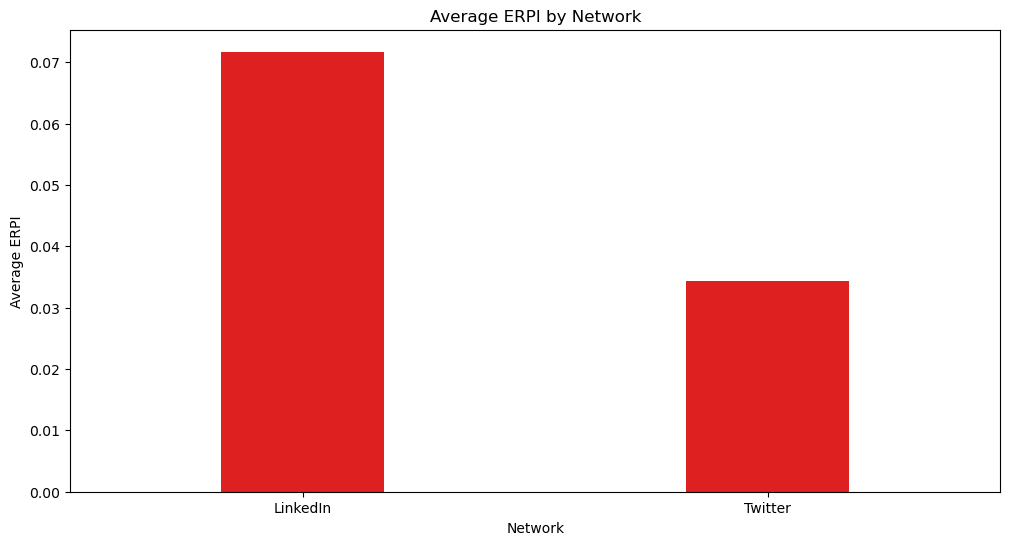

In [130]:
av_er = data.groupby('Network')['Engagement Rate (per Impression)'].mean().reset_index(name = 'Average ERPI')
# ERPI (Engagement rate per Impression)
plt.figure(figsize=(12,6))
sns.barplot(data = av_er,x = 'Network',y ='Average ERPI',color = 'Red',width = 0.35)
plt.title('Average ERPI by Network')
plt.show()

- Linked has the highest Engagement per Impression rate

###### Q3. How do the impressions and engagements vary across different networks?

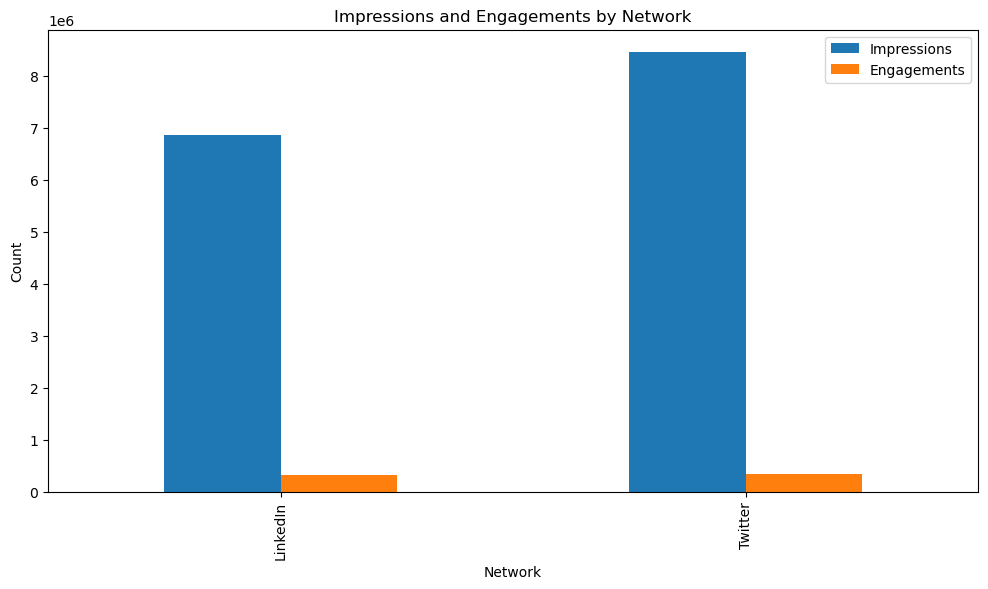

In [131]:
network_ie = data.groupby('Network')[['Impressions', 'Engagements']].sum()
network_ie.plot(kind='bar', figsize=(12, 6))
plt.title('Impressions and Engagements by Network')
plt.xlabel('Network')
plt.ylabel('Count')
plt.legend(["Impressions", "Engagements"])
plt.show()

###### Q4. What Content Type has the most Engagement ?

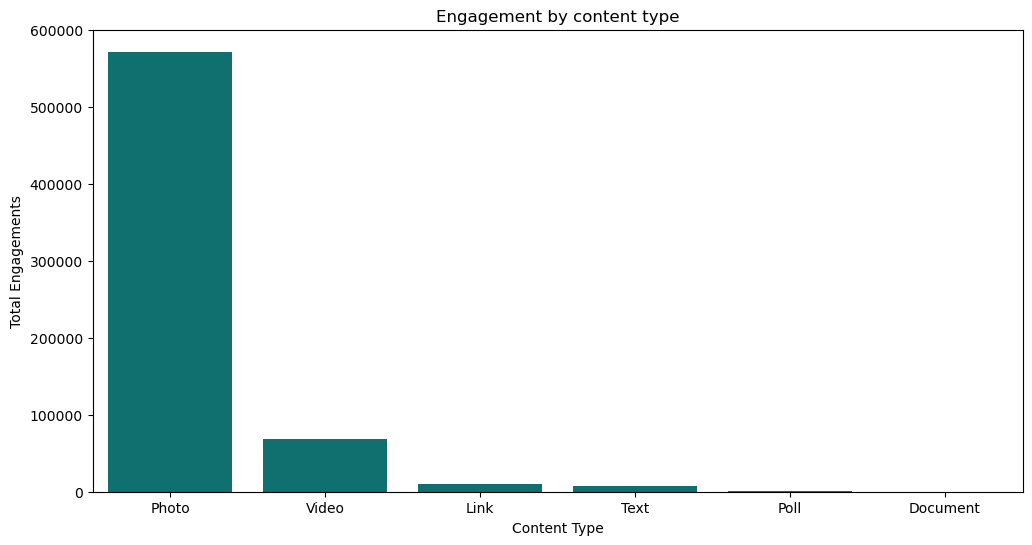

In [132]:
Ct = data.groupby('Content Type')['Engagements'].sum().reset_index(name = 'Total Engagements')
Content_engagement = Ct.sort_values(by = 'Total Engagements',ascending = False)
plt.figure(figsize=(12,6))
sns.barplot(data = Content_engagement,x = 'Content Type',y = 'Total Engagements',color = 'teal')
plt.title('Engagement by content type')
plt.show()

- Photos have the most Engagements

###### Q5. Who sent the most engaging post ?

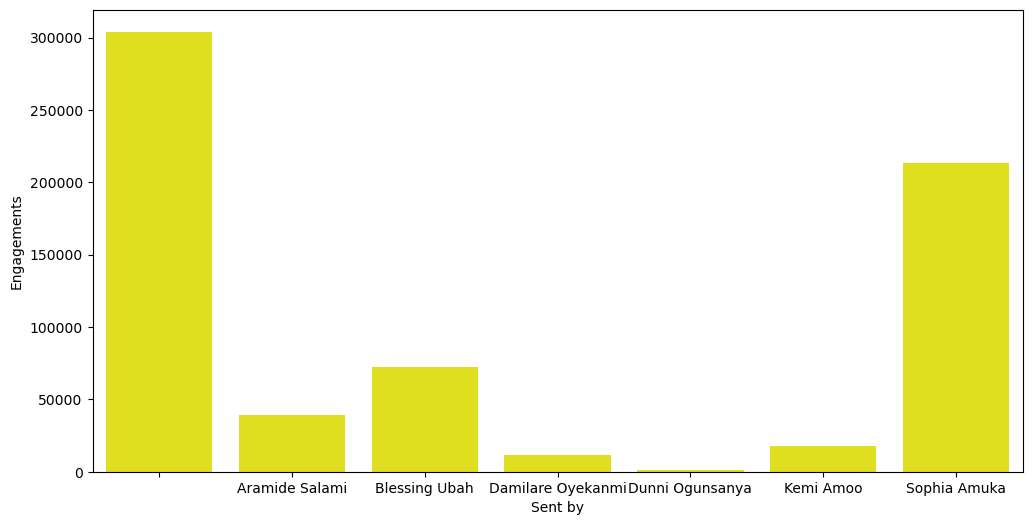

,Sent by,Engagements
0,,304059
1,Aramide Salami,39214
2,Blessing Ubah,72682
3,Damilare Oyekanmi,11486
4,Dunni Ogunsanya,1309
5,Kemi Amoo,17831
6,Sophia Amuka,213543


In [133]:
sent_by = data.groupby('Sent by')['Engagements'].sum().reset_index(name = 'Engagements')
plt.figure(figsize=(12,6))
sns.barplot(data = sent_by,x = 'Sent by',y = 'Engagements',color = 'Yellow')
plt.show()
sent_by

The above code displayed the unique values in the Sent by column and we can notice an empty string (''). This may be due to data entry errors. Since I do not have access to the source of the data, I'll be filtering the empty string data out to correctly answer my question

In [134]:
 sent_by = sent_by[sent_by.index != 0]

In [135]:
sent_by

,Sent by,Engagements
1,Aramide Salami,39214
2,Blessing Ubah,72682
3,Damilare Oyekanmi,11486
4,Dunni Ogunsanya,1309
5,Kemi Amoo,17831
6,Sophia Amuka,213543


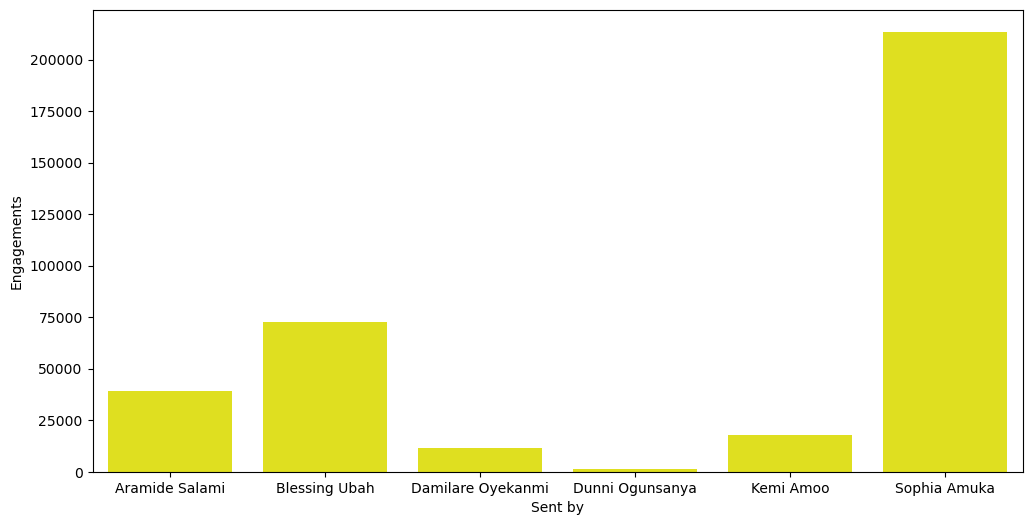

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(data = sent_by,x = 'Sent by',y = 'Engagements',color = 'Yellow')
plt.show()

- Sophia Amuka's post had the most Engagements

###### Q6. Total Engagements by Month

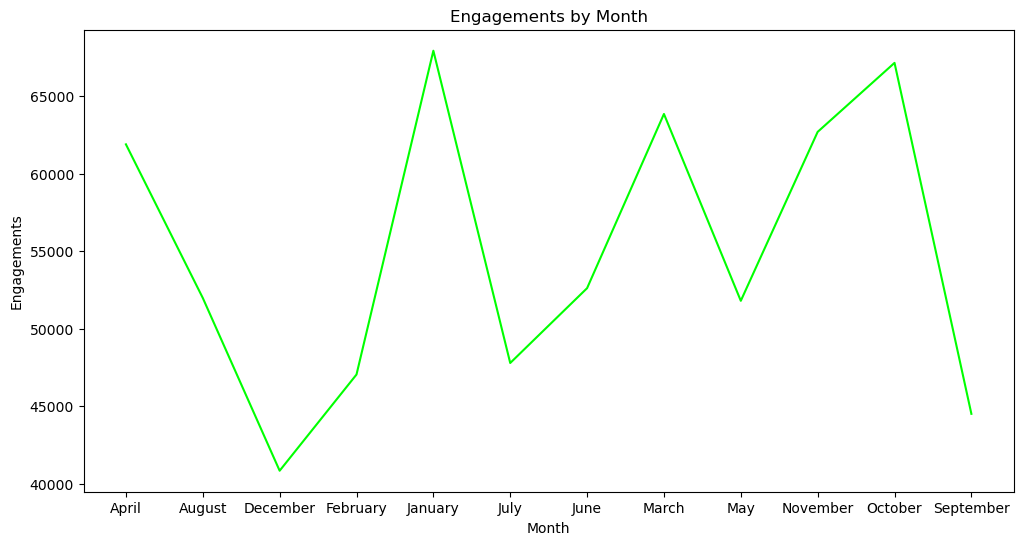

In [137]:
Te_m = data.groupby('Month')['Engagements'].sum().reset_index(name = 'Engagements')
plt.figure(figsize=(12,6))
sns.lineplot(data = Te_m, x = 'Month', y = 'Engagements',color = 'lime')
plt.title('Engagements by Month')
plt.show()

- January records the most engagements

###### Q7. What year has the most engagements?

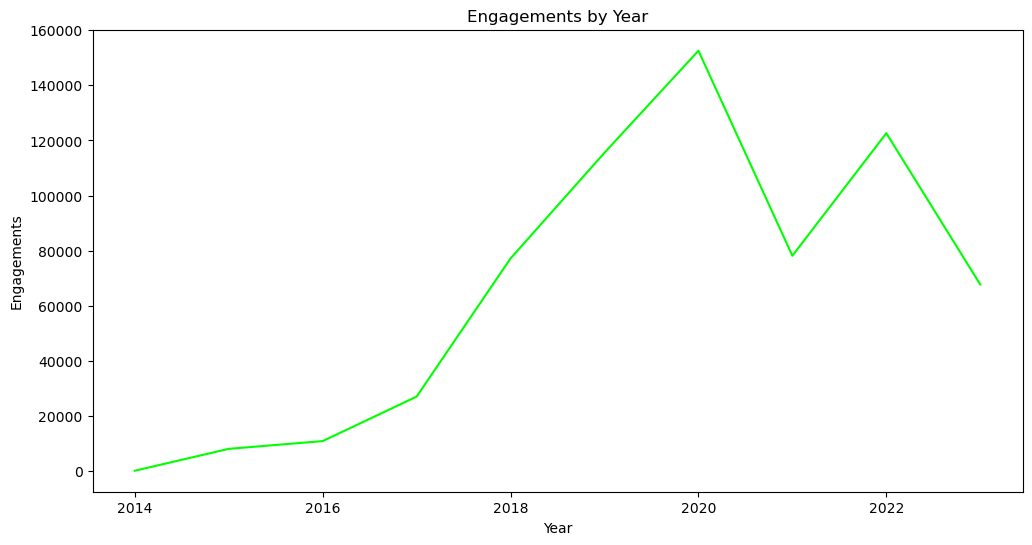

In [138]:
Te_y = data.groupby('Year')['Engagements'].sum().reset_index(name = 'Engagements')
plt.figure(figsize=(12,6))
sns.lineplot(data = Te_y, x = 'Year', y = 'Engagements',color = 'lime')
plt.title('Engagements by Year')
plt.show()

- Engagements peaked in 2020

###### Q8. What hour of the day has the highest engagements?

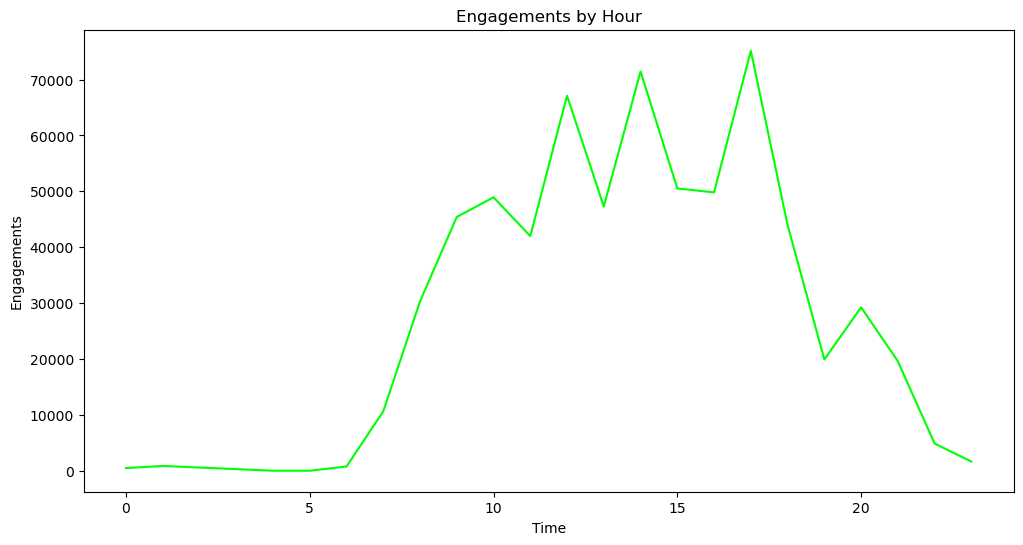

In [139]:
Te_h = data.groupby('Time')['Engagements'].sum().reset_index(name = 'Engagements')
plt.figure(figsize=(12,6))
sns.lineplot(data = Te_h, x = 'Time', y = 'Engagements',color = 'lime')
plt.title('Engagements by Hour')
plt.show()

- Highest engagements are recorded between the 10th hour and 17th hour

###### Q9. How do the click-through rates vary by post type or content type?

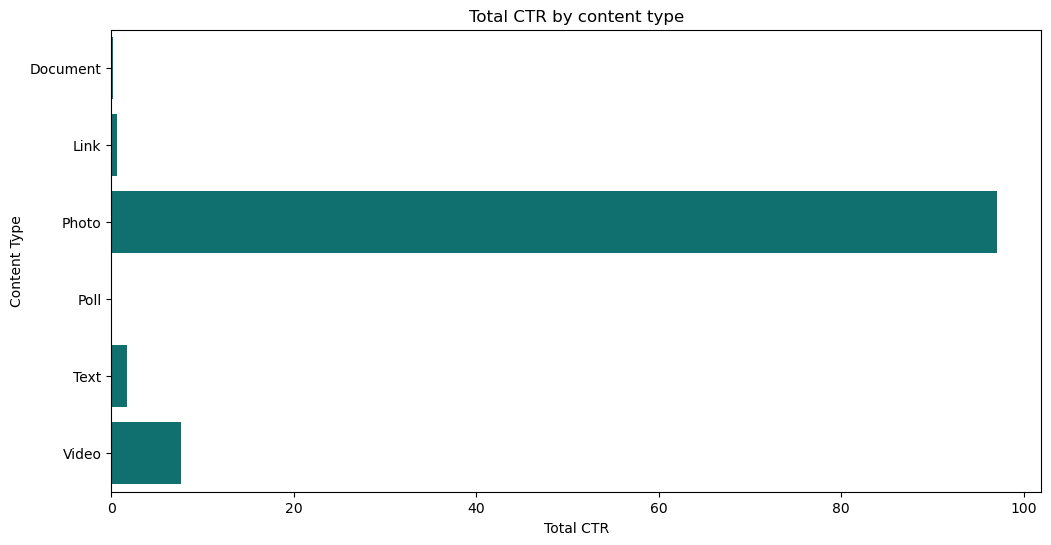

In [140]:
Ctr = data.groupby('Content Type')['Click-Through Rate'].sum().reset_index(name = 'Total CTR')
plt.figure(figsize=(12,6))
sns.barplot(data = Ctr,x = 'Total CTR',y = 'Content Type',color = 'teal')
plt.title('Total CTR by content type')
plt.show()

- Photo contents have the highest CTR followed by Video contents, then text

###### Q10. What Profiles have the highest engagements?

In [141]:
data.groupby('Profile')['Engagements'].sum().reset_index(name = 'Engagements')

,Profile,Engagements
0,'@StanbicIBTC,340703
1,Stanbic IBTC,319421


- @StanbicIBTC has the highest Engagements i.e the twitter handle

###### Q11. What posts have the most likes?(Top5)

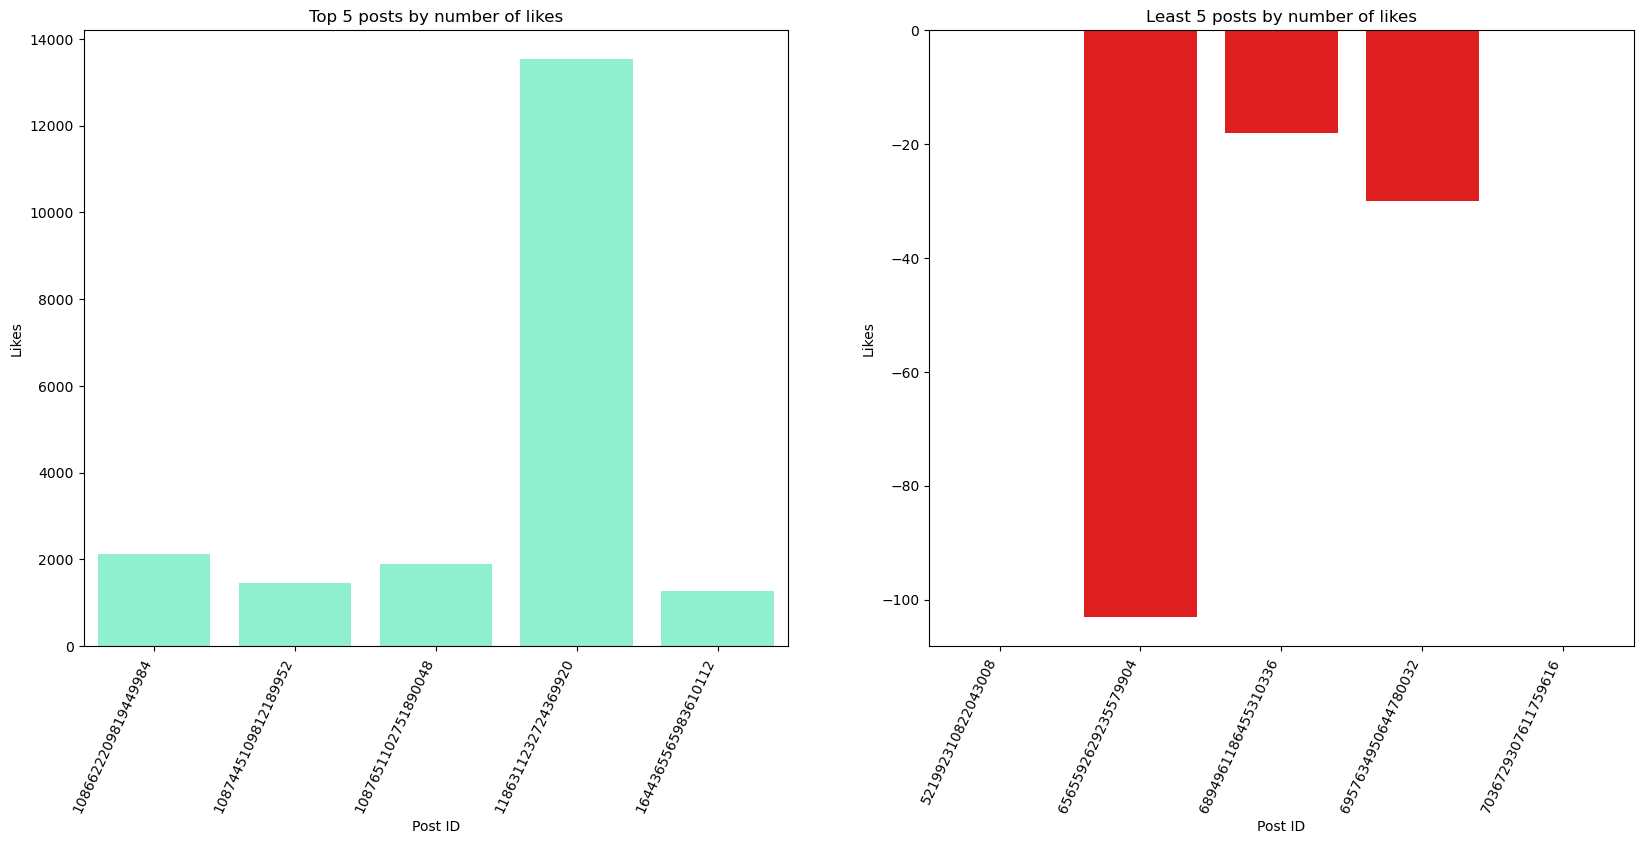

In [142]:
posts = data.groupby('Post ID')['Likes'].sum().reset_index(name = 'Likes')
top_posts = posts.sort_values(by = 'Likes',ascending = False)
top_5 = top_posts.head()
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
sns.barplot(data = top_5,x = 'Post ID', y = 'Likes',color = 'aquamarine')
plt.title('Top 5 posts by number of likes')
plt.xticks(rotation=65, ha='right')



posts = data.groupby('Post ID')['Likes'].sum().reset_index(name = 'Likes')
least_posts = posts.sort_values(by = 'Likes',ascending = True)
least_5 = least_posts.head()
plt.subplot(1,2,2)
sns.barplot(data = least_5,x = 'Post ID', y = 'Likes',color = 'red')
plt.title('Least 5 posts by number of likes')
plt.xticks(rotation=65, ha='right')
plt.show()


- Post ID's beginning with 1 are getting more attention than those beginnning with 5 upwards

###### Q11. What post got the most comments ?

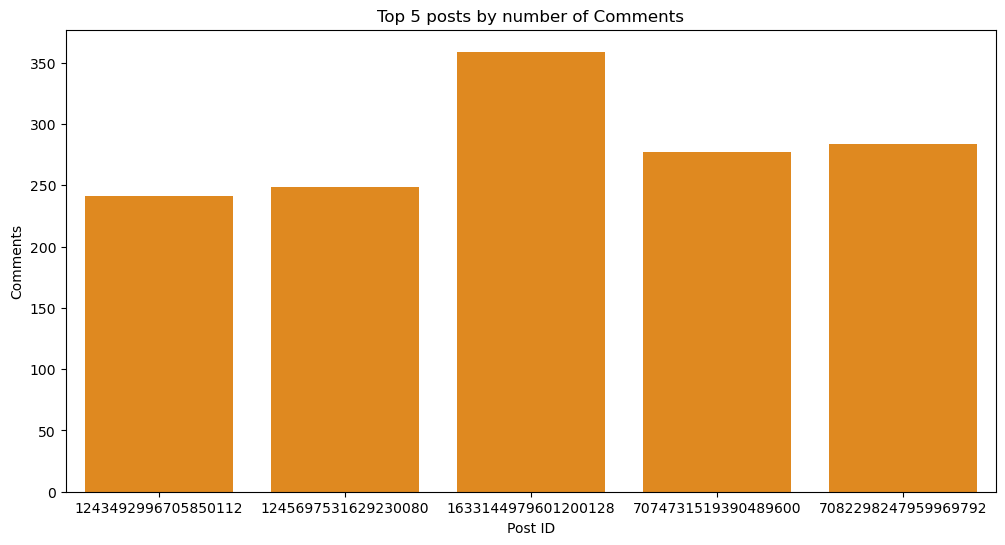

In [143]:
post = data.groupby('Post ID')['Comments'].sum().reset_index(name = 'Comments')
top_post = post.sort_values(by = 'Comments',ascending = False)
top_5 = top_post.head()
plt.figure(figsize =(12,6))
sns.barplot(data = top_5,x = 'Post ID', y = 'Comments',color = 'darkorange')
plt.title('Top 5 posts by number of Comments')
plt.show()

###### Q11. What post has the highest post-clicks ?

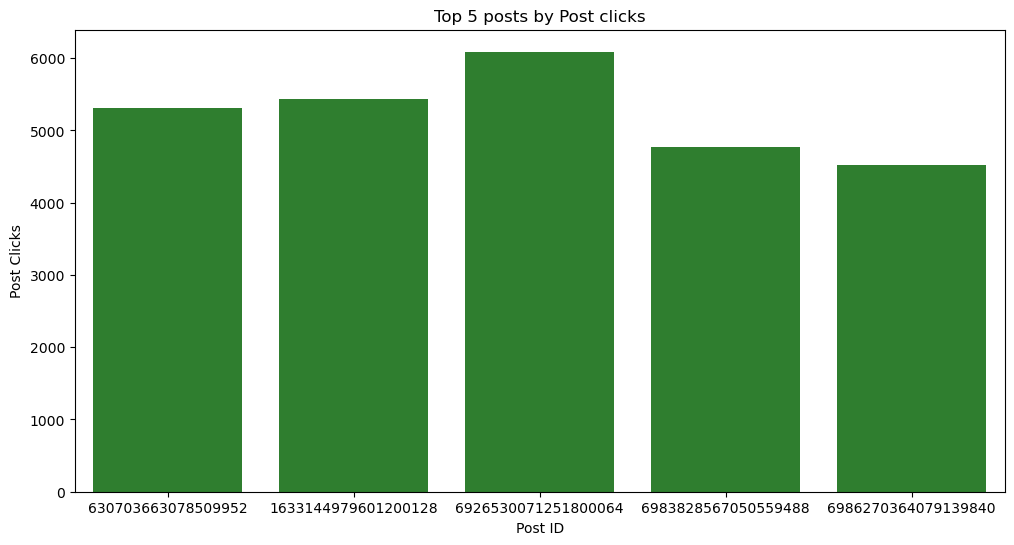

In [144]:
p_cl = data.groupby('Post ID')['Post Clicks (All)'].sum().reset_index(name = 'Post Clicks')
top_post_cl = p_cl.sort_values(by = 'Post Clicks',ascending = False)
top_5 = top_post_cl.head()
plt.figure(figsize =(12,6))
sns.barplot(data = top_5,x = 'Post ID', y = 'Post Clicks',color = 'forestgreen')
plt.title('Top 5 posts by Post clicks')
plt.show()

###### Q12. What is the trend of shares and reactions by year?

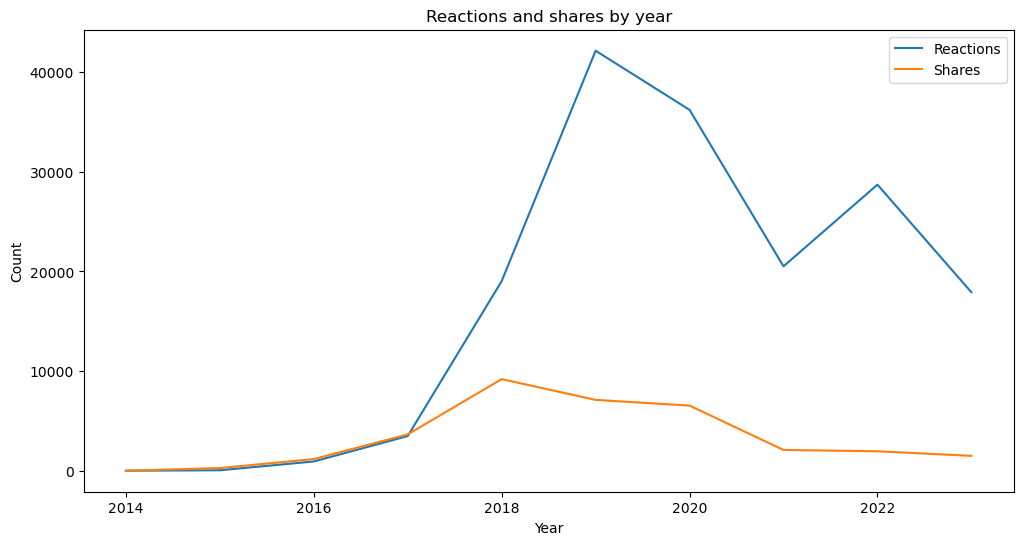

In [145]:
Trs = data.groupby('Year')[['Reactions', 'Shares']].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=Trs, x='Year', y='Reactions', label='Reactions')
sns.lineplot(data=Trs, x='Year', y='Shares', label='Shares')
plt.title('Reactions and shares by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


- The year 2019 has the highest reactions while the highest shares occured in 2018

###### Q13. What is the trend of shares and reactions by month?

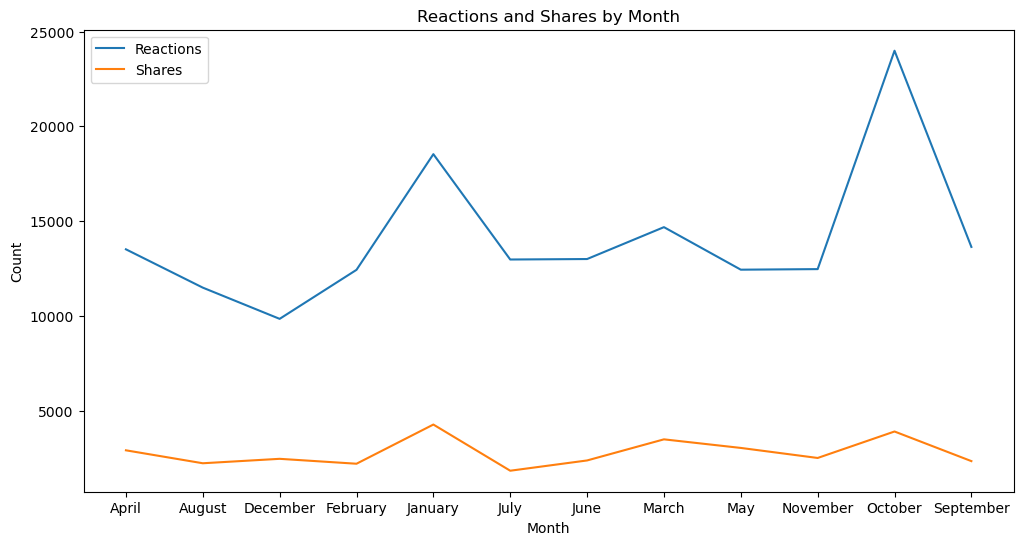

In [146]:
Trs_m = data.groupby('Month')[['Reactions', 'Shares']].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=Trs_m, x='Month', y='Reactions', label='Reactions')
sns.lineplot(data=Trs_m, x='Month', y='Shares', label='Shares')
plt.title('Reactions and Shares by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

- Highest reactions are in October while the highest post shares happened in January

###### Q14. What is the trend of shares and reactions by hour?

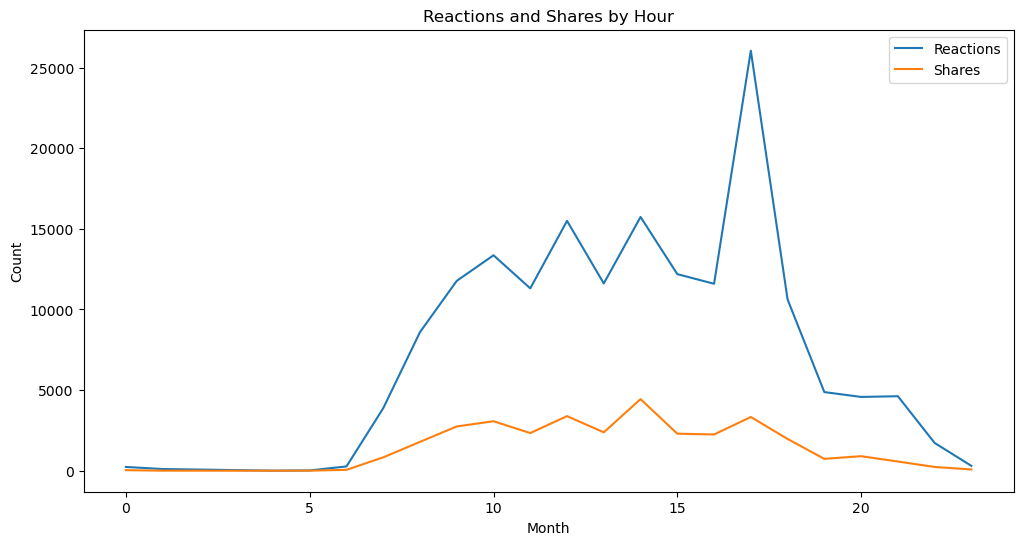

In [147]:
Trs_h = data.groupby('Time')[['Reactions', 'Shares']].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=Trs_h, x='Time', y='Reactions', label='Reactions')
sns.lineplot(data=Trs_h, x='Time', y='Shares', label='Shares')
plt.title('Reactions and Shares by Hour')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

- Highest reactions is around the 17th hour while the highest shares is around the 14th hour

##### Insights

- Twitter has the most engagements
- Linked has the highest Engagement per Impression rate
- Photos have the most Engagements
- Sophia Amuka's post had the most Engagements
- January records the most engagements
- Engagements peaked in 2020
- Highest engagements are recorded between the 10th hour and 17th hour
- Photo contents have the highest CTR followed by Video contents, then text
- @StanbicIBTC has the highest Engagements i.e the twitter handle

##### Recommendations

Based on the above Insights, the following points are recommended
- Leverage on Twitter: since twitter has the most engagements,It makes more sense to focus on this platform. Posting frequently on this platform can improve online presence and engagements
- Optimise LinkedIn content: Since LinkedIn has the highest engagement per impression rate, It would be great to continue to use the platform to reach out to professional audience by tailoring content to the target audience
- Priortize Visual content: Since Photo contents have the highest engagement and CTR(Click-through rate), Invest in high quality visual content that can appeal to the target audience
- Analyse Sophia's content: With the high engagements her content recieved, a deep-dive into her content strategy should be taken
- Strategize posting time : Given that the highest engagements were recieved between the  10th and 17th hour, more contents should be posted within these periods to increase Engagements
- A/B Testing: Experiment with different types of content, posting times, and messaging to see what resonates best with your audience. A/B testing can help you fine-tune your social media strategy
- Track and Measure Performance: Continuously monitor your social media metrics to assess the impact of these recommendations